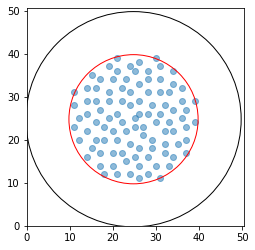

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def sunflower(n: int, alpha: float) -> np.ndarray:
    # Number of points respectively on the boundary and inside the cirlce.
    n_exterior = np.round(alpha * np.sqrt(n)).astype(int)
    n_interior = n - n_exterior

    # Ensure there are still some points in the inside...
    if n_interior < 1:
        raise RuntimeError(f"Parameter 'alpha' is too large ({alpha}), all "
                           f"points would end-up on the boundary.")
    # Generate the angles. The factor k_theta corresponds to 2*pi/phi^2.
    k_theta = np.pi * (3 - np.sqrt(5))
    angles = np.linspace(k_theta, k_theta * n, n)

    # Generate the radii.
    r_interior = np.sqrt(np.linspace(0, 1, n_interior))
    r_exterior = np.ones((n_exterior,))
    r = np.concatenate((r_interior, r_exterior))

    # Return Cartesian coordinates from polar ones.
    return r * np.stack((np.cos(angles), np.sin(angles)))

    # NOTE: say the returned array is called s. The layout is such that s[0,:]
    # contains X values and s[1,:] contains Y values. Change the above to
    #   return r.reshape(n, 1) * np.stack((np.cos(angles), np.sin(angles)), axis=1)
    # if you want s[:,0] and s[:,1] to contain X and Y values instead.

L=50
if __name__ == '__main__':
    fig, ax = plt.subplots()

    # Let's plot three sunflowers with different values of alpha!
    for alpha in ([0]):
        s = sunflower(100, alpha)
        s=((0.6*((L-0.5)/2)*s)+ (L-0.5)/2 +0.5)
        # NOTE: the 'alpha=0.5' parameter is to control transparency, it does
        # not have anything to do with the alpha used in 'sunflower' ;)
        ax.scatter(np.array(s[0],dtype=int),np.array(s[1],dtype=int), alpha=0.5)
        ax.set_xlim([0,L+0.5])
        ax.set_ylim([0,L+0.5])
        circle1=plt.Circle(((L-0.5)/2, (L-0.5)/2), (L)/2, color='k',fill=False)
        ax.add_patch(circle1)
        circle2=plt.Circle(((L-0.5)/2, (L-0.5)/2), 0.6*(L)/2, color='r',fill=False)
        ax.add_patch(circle2)

    # Display as square plot with equal axes and add a legend. Then show the result :)
    ax.set_aspect('equal')
    plt.show()

In [12]:
s

array([[25.25      , 25.38048125, 26.53422405, 22.70446326, 27.76857775,
        24.38362533, 23.56500813, 28.95912992, 21.34799153, 27.14774648,
        26.66251204, 20.96720451, 30.29951765, 22.15510355, 24.53235093,
        29.66994238, 19.28517337, 29.61189341, 24.95751293, 21.0818189 ,
        31.86497073, 19.63581503, 26.78644797, 28.80866567, 18.28425856,
        32.0243058 , 22.31200161, 22.62524856, 32.24075521, 17.47821356,
        29.67116244, 26.65747931, 18.57496748, 33.79437826, 19.34025371,
        25.29307342, 31.2666557 , 16.21033184, 32.57856332, 23.58177603,
        20.22258686, 34.46668449, 16.64461301, 28.65207485, 28.98272228,
        16.20271688, 34.92318983, 20.07650478, 23.07904773, 33.76718607,
        14.77758079, 32.15848033, 25.64221781, 17.62340826, 36.20314354,
        16.71726401, 26.79329309, 31.64030767, 14.17305439, 35.22436035,
        21.68260946, 20.41261733, 36.06846718, 14.08349258, 30.85627769,
        28.26023763, 15.0834688 , 37.29992537, 17.6

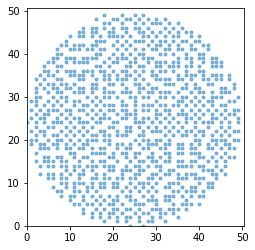

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def sunflower(n: int, alpha: float) -> np.ndarray:
    # Number of points respectively on the boundary and inside the cirlce.
    n_exterior = np.round(alpha * np.sqrt(n)).astype(int)
    n_interior = n - n_exterior

    # Ensure there are still some points in the inside...
    if n_interior < 1:
        raise RuntimeError(f"Parameter 'alpha' is too large ({alpha}), all "
                           f"points would end-up on the boundary.")
    # Generate the angles. The factor k_theta corresponds to 2*pi/phi^2.
    k_theta = np.pi * (3 - np.sqrt(5))
    angles = np.linspace(k_theta, k_theta * n, n)

    # Generate the radii.
    r_interior = np.sqrt(np.linspace(0, 1, n_interior))
    r_exterior = np.ones((n_exterior,))
    r = np.concatenate((r_interior, r_exterior))

    # Return Cartesian coordinates from polar ones.
    return r * np.stack((np.cos(angles), np.sin(angles)))

    # NOTE: say the returned array is called s. The layout is such that s[0,:]
    # contains X values and s[1,:] contains Y values. Change the above to
    #   return r.reshape(n, 1) * np.stack((np.cos(angles), np.sin(angles)), axis=1)
    # if you want s[:,0] and s[:,1] to contain X and Y values instead.

L=50
if __name__ == '__main__':
    fig, ax = plt.subplots()

    # Let's plot three sunflowers with different values of alpha!
    for alpha in ([0]):
        s = sunflower(1000, alpha)
        s=((((L-0.5)/2)*s)+ (L-0.5)/2 +0.5)

        # NOTE: the 'alpha=0.5' parameter is to control transparency, it does
        # not have anything to do with the alpha used in 'sunflower' ;)
        ax.scatter(np.array(s[0],dtype=int),np.array(s[1],dtype=int),marker=".", alpha=0.5)
        
        ax.set_xlim([0,L+0.5])
        ax.set_ylim([0,L+0.5])


    # Display as square plot with equal axes and add a legend. Then show the result :)
    ax.set_aspect('equal')
    plt.show()

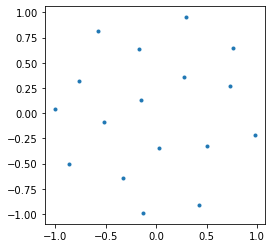

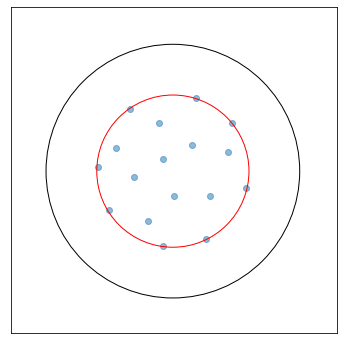

In [28]:
from math import sqrt, sin, cos, pi
phi = (1 + sqrt(5)) / 2  # golden ratio

def sunflower(n, alpha=0, geodesic=False):
    points = []
    angle_stride = 360 * phi if geodesic else 2 * pi / phi ** 2
    b = round(alpha * sqrt(n))  # number of boundary points
    for k in range(1, n + 1):
        r = radius(k, n, b)
        theta = k * angle_stride
        points.append((r * cos(theta), r * sin(theta)))
    return points

def radius(k, n, b):
    if k > n - b:
        return 1.0
    else:
        return sqrt(k - 0.5) / sqrt(n - (b + 1) / 2)


# example
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    points = sunflower(17, alpha=2, geodesic=False)
    xs = np.array([point[0] for point in points])
    ys = np.array([point[1] for point in points])



    ax.scatter(xs, ys,marker=".")
    ax.set_aspect('equal') # display as square plot with equal axes
    plt.show()
    
    
L=70
if __name__ == '__main__':
    fig, ax = plt.subplots(figsize=(6,6))

    # Let's plot three sunflowers with different values of alpha!
    for alpha in ([0]):
        points = sunflower(17, alpha=2, geodesic=False)
        xs = np.array([point[0] for point in points])
        ys = np.array([point[1] for point in points])
        s = np.array([xs,ys])

        s=((0.6*((L-0.5)/2)*s)+ (L-0.5)/2 +0.5)

        ax.scatter(np.array(s[0],dtype=int),np.array(s[1],dtype=int), alpha=0.5)
        ax.set_xlim([-10,80])
        ax.set_ylim([-10,80])
        circle1=plt.Circle(((L-0.5)/2, (L-0.5)/2), (L)/2, color='k',fill=False)
        ax.add_patch(circle1)
        circle2=plt.Circle(((L-0.5)/2, (L-0.5)/2), 0.6*(L)/2, color='r',fill=False)
        ax.add_patch(circle2)

    # Display as square plot with equal axes and add a legend. Then show the result :)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()